In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('sales_data.csv')
df

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [5]:
df.isna().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(1)

# Dropping Duplicates

In [9]:
df.drop_duplicates(inplace =True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isna().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

# Dropping Null Values

In [12]:
df = df.dropna()

In [13]:
df.describe()

,price,quantity,revenue
count,364.000000,364.000000,364.000000
mean,210.659341,14.478022,2052.829670
std,227.179628,8.533974,1905.286242
min,20.000000,3.000000,300.000000
25%,50.000000,8.000000,787.500000
50%,100.000000,12.000000,1200.000000
75%,250.000000,20.000000,2400.000000
max,1200.000000,50.000000,7200.000000


In [14]:
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [16]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\TASNEEM\AppData\Local\Temp\ipykernel_19968\3532345252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


# Questions

## 1.What was the total revenue generated by the company over the course of the year?

In [20]:
revenue = df.revenue.sum()
revenue

np.float64(747230.0)

## 2.Which product had the highest revenue? How much revenue did it generate?


In [93]:
df_2 = df.groupby('product')[['revenue']].sum().reset_index().sort_values(by='revenue', ascending=False).reset_index(drop=True).head()
df_2

,product,revenue
0,Smartphone,427800.0
1,Smartwatch,58800.0
2,Speaker,39680.0
3,Coat,33800.0
4,Watch,30450.0


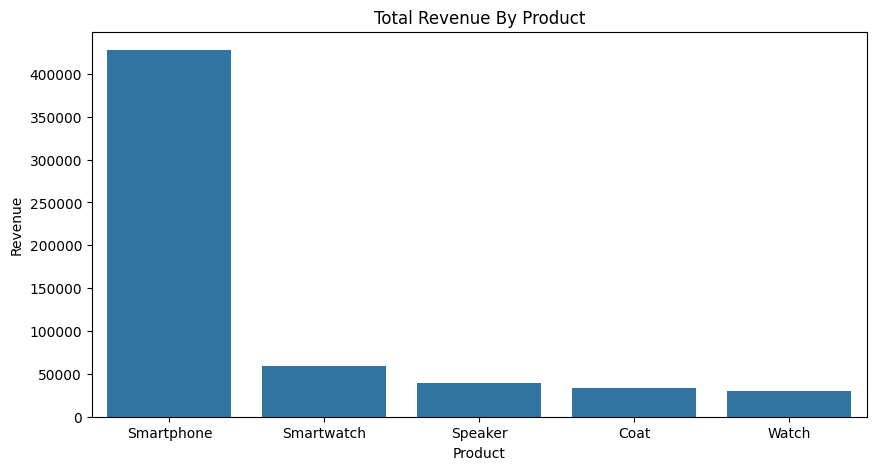

In [76]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_2, x='product', y='revenue')
plt.title('Total Revenue By Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.show()

## 3.What was the average price of a product sold by the company?

In [70]:
df_3 = df.groupby('product')[['price']].mean().reset_index().sort_values('price', ascending=False).reset_index(drop=True)
df_3

,product,price
0,Laptop,1200.0
1,Smartphone,600.0
2,Tablet,400.0
3,Smartwatch,200.0
4,Watch,150.0
5,Coat,100.0
6,Headphones,100.0
7,Speaker,80.0
8,Sneakers,80.0
9,Backpack,50.0


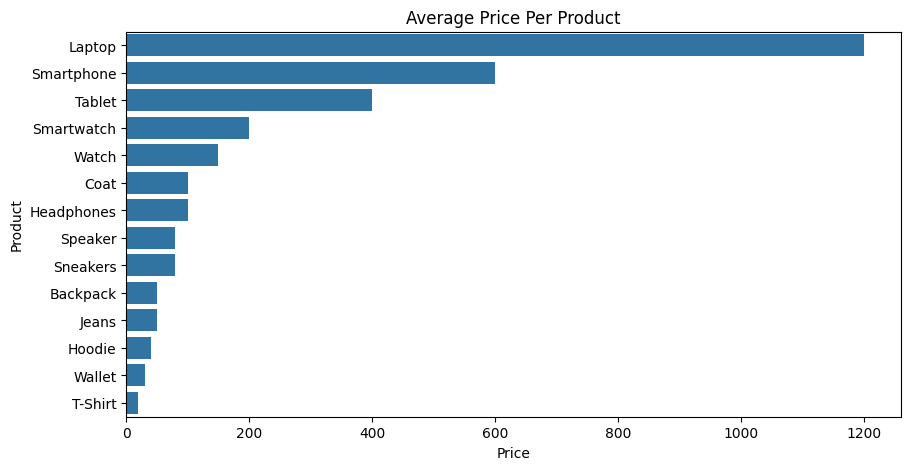

In [73]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_3, x='price', y='product', orient='h')
plt.title('Average Price Per Product')
plt.xlabel('Price')
plt.ylabel('Product')
plt.show()

## 4.What was the total quantity of products sold by the company?

In [91]:
df.quantity.sum()

np.float64(5270.0)

In [61]:
df_4 = df.groupby('product')[['quantity']].sum().reset_index().sort_values(by='quantity', ascending=False).reset_index(drop=True)
df_4

,product,quantity
0,T-Shirt,1005.0
1,Smartphone,713.0
2,Speaker,496.0
3,Hoodie,495.0
4,Jeans,413.0
5,Backpack,408.0
6,Wallet,405.0
7,Coat,338.0
8,Smartwatch,294.0
9,Sneakers,270.0


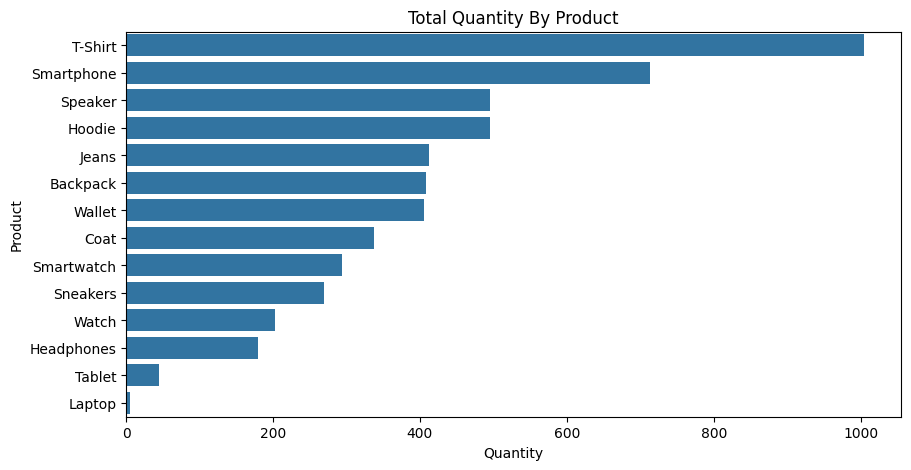

In [62]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_4, x='quantity', y='product', orient='h')
plt.title('Total Quantity By Product')
plt.xlabel('Quantity')
plt.ylabel('Product')
plt.show()

## 5.Which category had the highest revenue? How much revenue did it generate?

In [85]:
df_5 = df.groupby('category')[['revenue']].sum().reset_index().sort_values(by='revenue', ascending=False).reset_index(drop=True).head()
df_5

,category,revenue
0,Electronics,509480.0
1,Accessories,101400.0
2,Clothing,93150.0
3,Shoes,20640.0
4,Bags,19500.0


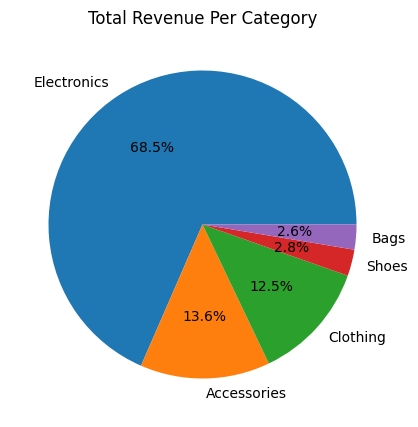

In [90]:
plt.figure(figsize=(12, 5))
plt.pie(df_5['revenue'], labels=df_5['category'], autopct='%1.1f%%')
plt.title('Total Revenue Per Category')
plt.show()

## 6.What was the average revenue per sale?

In [44]:
df.revenue.mean()

np.float64(2052.8296703296705)

## 7.What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)

In [49]:
df['quarter'] = df.date.dt.quarter
df

C:\Users\TASNEEM\AppData\Local\Temp\ipykernel_19968\4151166996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'] = df.date.dt.quarter


,date,product,category,price,quantity,revenue,year,quarter
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0,2022,1
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0,2022,1
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0,2022,1
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0,2022,1
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0,2022,1
...,...,...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0,2022,4
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0,2022,4
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0,2022,4
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0,2022,4


In [54]:
df_7 = df.groupby('quarter')[['revenue']].sum().reset_index()
df_7

,quarter,revenue
0,1,182100.0
1,2,177370.0
2,3,195430.0
3,4,192330.0


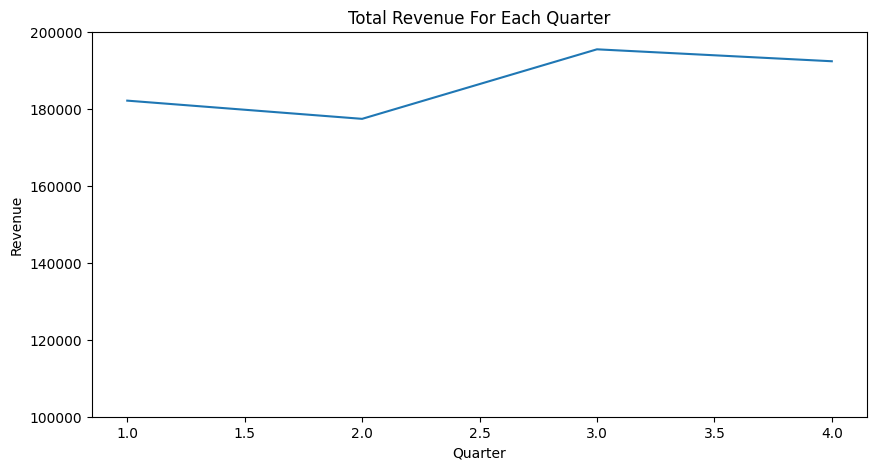

In [69]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_7, x='quarter', y='revenue')
plt.title('Total Revenue For Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.ylim(100000, 200000)
plt.show()